<a href="https://colab.research.google.com/github/perrijuan/numerical-computing/blob/main/rascunho_do_trabalho_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#questão 1



interpolação de newton


Passo 1: Definir a Função de Diferença Dividida
Esta função constrói uma tabela de diferenças divididas e retorna os coeficientes.

Passo 2: Definir a Função de Avaliação do Polinômio de Newton
Esta função avalia o polinômio em um ponto específico usando os coeficientes obtidos da diferença dividida.

Passo 3: Exemplo de Uso
Você pode usar as funções acima para interpolar valores com base em pontos de dados fornecidos. Veja como fazer isso:

rascunhos e abstraçoes do trabalho 2

In [ ]:
import numpy as np
#passo 1
def divide_diferenca(x,y):
  n = len(y)
  coef = np.zeros([n, n])
  coef[:, 0] = y

  for j in range(1, n):
    for i in range(n - j):
      coef[i][j] = (coef[i+1][j-1]- coef[i][j-1])/(x[i+j]- x[i])


  return coef[0]

#passo 2
def poli_newton_simplificado(coef, x_data, x):
  #vai fazendo o calculo interativo do in
  n = len(coef) - 1
  p = coef[n]

  for k in range(n-1, -1, -1):
    p = coef[k] + (x - x_data[k]) * p

  return p
#passo 3
x = np.array([0,2,3,5])
y = np.array([1,5,0,8])

coeficientes = divide_diferenca(x,y)

x_valor = 10
interpolacao_valor = poli_newton_simplificado(coeficientes, x, x_valor)

print(f"o valor da interpolacao em x = {x_valor} foi {interpolacao_valor:.6f}")

o valor da interpolacao em x = 10 foi 2293839.000000


interpolacao para o grau n usando uma bibloteca como gabarito no caso o scipy


In [ ]:
pip install numpy scipy matplotlib

gabarito da questao

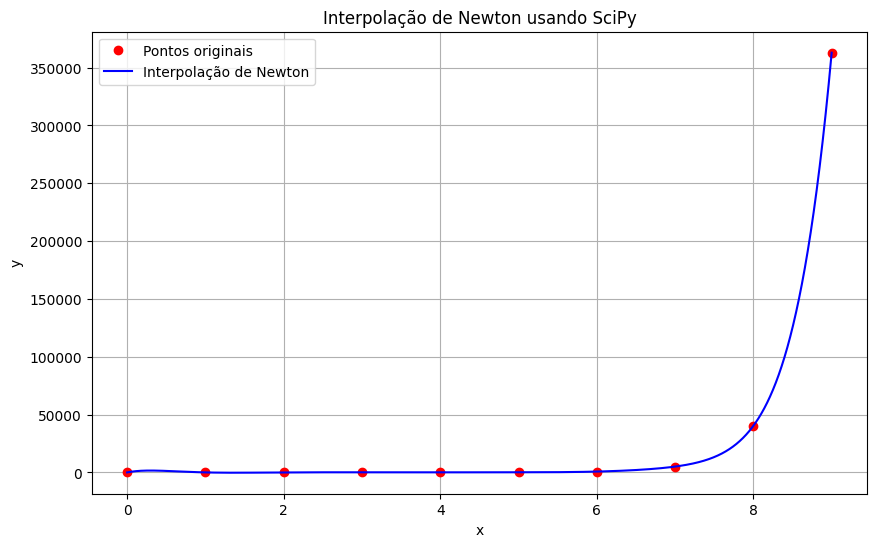

Valor interpolado para x = 4: y = 24.0
Coeficientes da interpolação:
[-0.00407267  0.03665406 -0.14661626  0.3421046  -0.5131569   0.5131569
 -0.3421046   0.14661626 -0.03665406  0.00407267]


In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,1,2,6,24,120,720,5040,40320,362880])

#x = np.array([0,2,3,5])
#y = np.array([1,5,0,8])

# Criar o interpolador de Newton
interp = interpolate.BarycentricInterpolator(x, y)

# Função para avaliar o polinômio interpolador
def newton_interp(x_new):
    return interp(x_new)

# Gerar pontos para plotagem
x_new = np.linspace(x.min(), x.max(), 1000000)
y_new = newton_interp(x_new)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Pontos originais')
plt.plot(x_new, y_new, 'b-', label='Interpolação de Newton')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolação de Newton usando SciPy')
plt.legend()
plt.grid(True)
plt.show()

# Exemplo de uso para interpolar um novo ponto
x_interp = 4
y_interp = newton_interp(x_interp)
print(f"Valor interpolado para x = {x_interp}: y = {y_interp}")

# Imprimir os coeficientes (opcional)
print("Coeficientes da interpolação:")
print(interp.wi)

In [ ]:
import numpy as np

# Função para calcular as diferenças divididas (sem mudanças)
def divide_diferenca(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])

    return coef[0]  # Retorna os coeficientes

# Função para calcular o valor do polinômio utilizando a forma aninhada
def poli_newton_simplificado(coef, x_data, x):
    n = len(coef) - 1
    p = coef[n]  # Começa com o último coeficiente

    # Constrói o polinômio usando a equação aninhada
    for k in range(n - 1, -1, -1):
        p = coef[k] + (x - x_data[k]) * p

    return p
def testar_interpolacao(x,y,x_valor):
  coeficientes = divide_diferenca(x,y)
  interpolacao_valor = poli_newton_simplificado(coeficientes, x,x_valor)
  print(f"o valor da interpolacao em x = {x_valor} foi {interpolacao_valor:.6f}")

# Caso 1: Pequeno conjunto de dados
x1 = np.array([1, 4, 7])
y1 = np.array([2, 16, 34])
print("Caso 1:")
testar_interpolacao(x1, y1, 5)


# Caso 2: Conjunto de dados médio
x2 = np.array([0, 1, 2, 3, 4, 5])
y2 = np.array([1, 8, 27, 64, 125, 216])
print("\nCaso 2:")
testar_interpolacao(x2, y2, 2.5)

# Caso 3: Grande conjunto de dados
x3 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y3 = np.array([1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880])
print("\nCaso 3:")
testar_interpolacao(x3, y3, 4.5)

Caso 1:
o valor da interpolacao em x = 5 foi 21.555556

Caso 2:
o valor da interpolacao em x = 2.5 foi 42.875000

Caso 3:
o valor da interpolacao em x = 4.5 foi 108.613983


comparacao para os casos bases diferentes com tamanhos diferentes para graus e coef diferentes mostrando que nosso algoritimo esta correto

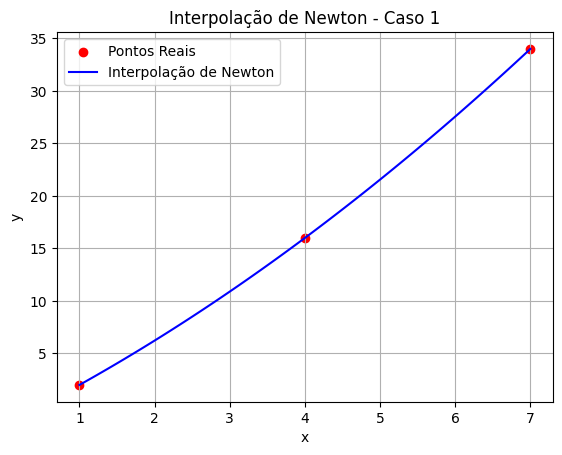

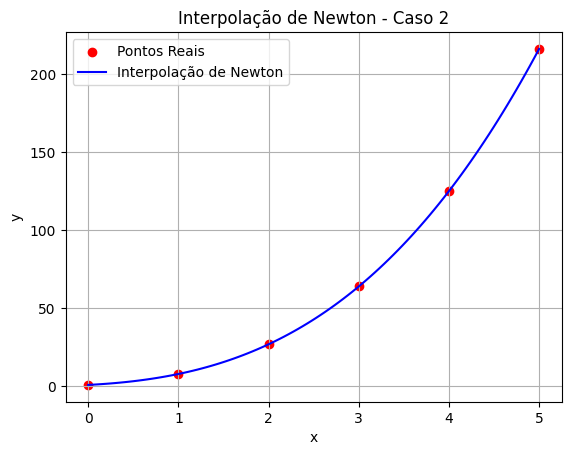

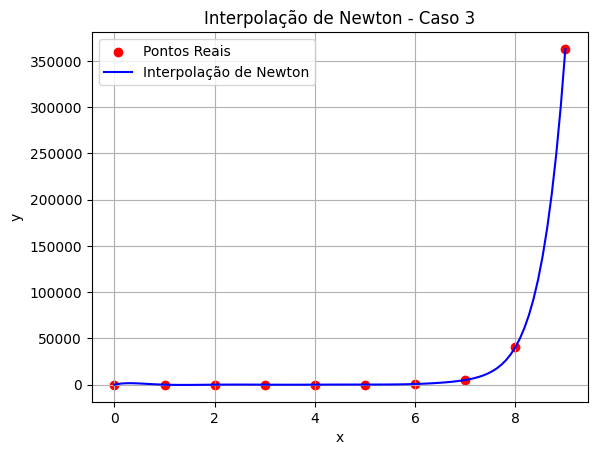

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular as diferenças divididas
def divide_diferenca(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])

    return coef[0]

# Função para calcular o valor do polinômio de Newton usando a forma aninhada
def poli_newton_simplificado(coef, x_data, x):
    n = len(coef) - 1
    p = coef[n]

    for k in range(n - 1, -1, -1):
        p = coef[k] + (x - x_data[k]) * p

    return p

# Função para gerar o gráfico de interpolação
def gerar_grafico(x, y, x_valor_min, x_valor_max, nome):
    coeficientes = divide_diferenca(x, y)

    # Valores de x para interpolação (geramos 100 pontos entre o mínimo e o máximo)
    x_interp = np.linspace(x_valor_min, x_valor_max, 100)

    # Valores interpolados de y para cada ponto em x_interp
    y_interp = [poli_newton_simplificado(coeficientes, x, xi) for xi in x_interp]

    # Plot dos pontos reais
    plt.scatter(x, y, color='red', label="Pontos Reais")

    # Plot da curva interpolada
    plt.plot(x_interp, y_interp, color='blue', label="Interpolação de Newton")

    # Configurações do gráfico
    plt.title(f'Interpolação de Newton - {nome}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Caso 1: Pequeno conjunto de dados
x1 = np.array([1, 4, 7])
y1 = np.array([2, 16, 34])
gerar_grafico(x1, y1, min(x1), max(x1), "Caso 1")

# Caso 2: Conjunto de dados médio
x2 = np.array([0, 1, 2, 3, 4, 5])
y2 = np.array([1, 8, 27, 64, 125, 216])
gerar_grafico(x2, y2, min(x2), max(x2), "Caso 2")

# Caso 3: Grande conjunto de dados
x3 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y3 = np.array([1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880])
gerar_grafico(x3, y3, min(x3), max(x3), "Caso 3")


#questão 2
erros de runge e nodes de chebshev

questao a :
Polinômios de Tchebychev

fazendo aplicação original com o fenomeno de runge

usando biblotecas para a interpolação ja prontas

erro maximo para n = 5: 0.4303246159624491
erro maximo para n = 10: 1.9154342696799338
erro maximo para n = 15: 2.0967229090176507
erro maximo para n = 20: 58.40669065757495


<Figure size 1000x600 with 0 Axes>

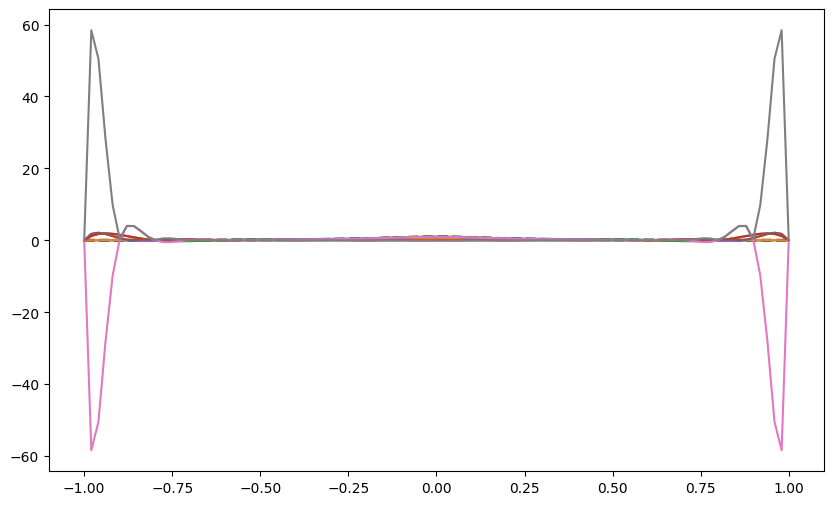

In [ ]:
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt

#definir a função de runge
def runge(x):
     return 1/(1+25*x**2)

# numnero de pontos de interpolação
n_valores=[5,10,15,20]

# pontos de controle ~x
x_controle = np.linspace(-1,1,100)

#usando da bibloteca scipy para fazer a interpolação
plt.figure(figsize=(10,6))
plt.figure(figsize=(10, 6))
plt.plot(x_controle, runge(x_controle), 'k--', label='Função de Runge f(x)', linewidth=2)
for n in n_valores:

  x_interp = np.linspace(-1,1, n+1)
  y_interpolacao = runge(x_interp)

  ## constroi o polinomio interpolador
  polinomio = np.polyfit(x_interp, y_interpolacao, n)
  p_n = np.poly1d(polinomio)

  plt.plot(x_controle, p_n(x_controle), label=f'Polinômio Interpolador p_{n}(x)', linewidth=1.5)

  #calculo do erro maximo

  erro = np.abs(runge(x_controle) - p_n(x_controle))
  e_n = np.max(erro)

  print(f"erro maximo para n = {n}: {e_n}")
  plt.plot(x_controle, erro, label=f'erro |f(x) - p_{n}(x)| para n = {n}', linewidth=1.5)



usando os nos de chebshev

erro maximo para n = 5: 0.5534788672877784
erro maximo para n = 10: 0.10902564197574771
erro maximo para n = 15: 0.08181531115162599
erro maximo para n = 20: 0.015007174524631961


<Figure size 1000x600 with 0 Axes>

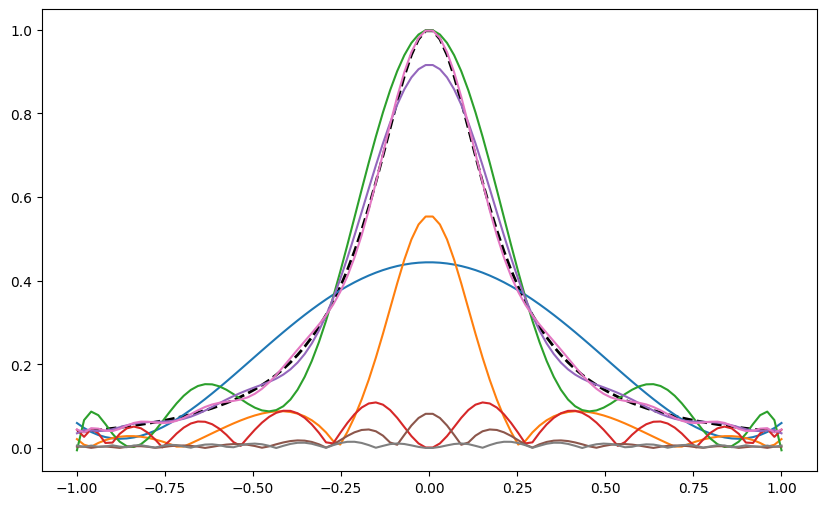

In [ ]:
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt

#definir a função de runge
def runge(x):
     return 1/(1+25*x**2)


#nos de chebshev

def chebyshev(x):
  return np.cos((2*np.arange(n+1)+1)/(2*n+2)*np.pi)

# numnero de pontos de interpolação
n_valores=[5,10,15,20]

# pontos de controle ~x
x_controle = np.linspace(-1,1,100)

#usando da bibloteca scipy para fazer a interpolação
plt.figure(figsize=(10,6))
plt.figure(figsize=(10, 6))
plt.plot(x_controle, runge(x_controle), 'k--', label='Função de Runge f(x)', linewidth=2)
for n in n_valores:

  x_interp = chebyshev(n)
  y_interpolacao = runge(x_interp)

  ## constroi o polinomio interpolador
  polinomio = np.polyfit(x_interp, y_interpolacao, n)
  p_n = np.poly1d(polinomio)

  plt.plot(x_controle, p_n(x_controle), label=f'Polinômio Interpolador p_{n}(x) (Chebyshev)', linewidth=1.5)

  #calculo do erro maximo

  erro = np.abs(runge(x_controle) - p_n(x_controle))
  e_n = np.max(erro)

  print(f"erro maximo para n = {n}: {e_n}")
  plt.plot(x_controle, erro, label=f'erro |f(x) - p_{n}(x)| para n = {n}', linewidth=1.5)

  # Customizar o gráfico


bibloteca para entender como os nos de chebshev funcionam em um caso simples


descrição do problema :

temos por definição um problema quando trabalhamos com interpolação pois a medida que trabalhamos com funções podemos ter um problema de ruido, logo pois em uma abordagem inocente poderíamos achar que quanto mais pontos aplicamos para fazer uma interpolação teríamos uma representação precisa sendo como resolver esse problema de forma numérica a chegar no caso que queremos ter uma precisão que não obtenha ruido, logo o matemático russo chebychev, apresenta uma solução.


equação onde acontece o problema clássico de runge.

$$f(x) = \frac{1}{1+25 x^2},$$
para aplicação a questão nos da uma variedade de pontos de interpolação sendo n = 5,10,15 e 20

foi analisado com dois graficos e dados sendo para para o valor de n de forma respectiva sendo o valor :

erro máximo para n = 5: 0.4303246159624491

erro máximo para n = 10: 1.9154342696799338

erro máximo para n = 15: 2.0967229090176507

erro máximo para n = 20: 58.40669065757495

para valores de n crescente o erro também cresce de forma acentuada, feito isso foi analisado os resultados dos gráficos sendo um gráfico mostrando a interpolação e outro mostrando o erro absoluto que mostra nas extremidades acontece o efeito de runge, e um segundo que mostra como o ruido esta na interpolação sendo que simétricos. foi observado que nas extremidades o erro se propagou de forma exponencial, logo quantos maior os numeros de interpolação maior o nosso erro.

analise da função pois o tratamento de erro de ruido, aplicando nos node of chebshev, sendo representado por:

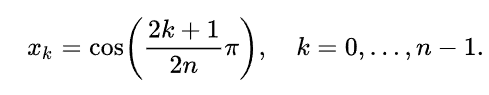


logo a distribuição entre o intervalo [-1,1], para a aplicação.

erro maximo para n = 5: 0.5534788672877784

erro maximo para n = 10: 0.10902564197574771

erro maximo para n = 15: 0.08181531115162599

erro maximo para n = 20: 0.015007174524631961

sendo o inverso da primeira tabela, em que quanto mais pontos para a nossa interpolação melhor ela se torna e com isso temos uma abordagem numérica mais precisa e um erro absoluto menor.



In [ ]:
import numpy as np
from numpy.polynomial import chebyshev

c = np.array([3,5,7,8])

print(f'The shape of the array is {c.shape}')
print(f'The dimension of the array is {c.ndim}D')
print(f'The datatype of the array is {c.dtype}')

resutado = chebyshev.chebint(c, m=1,k=1,lbnd=-2)

print(f'a serie resultante {resutado}')

The shape of the array is (4,)
The dimension of the array is 1D
The datatype of the array is int64
a serie resultante [-61.41666667  -0.5         -0.75         1.16666667   1.        ]


# questao 3

integração numerica

usando a regra do trapesio para a inplementação simples/composta da integração numerica


In [ ]:
import numpy as np

#f - função

def f(x):
  return np.sin(x)

#a e b - intervalo da integração
def trapezio_composta(a,b,n):
  #segundo a formula
  h = (b-a)/n

  integral=0*(f(a)+f(b))

  for i in range(1,n):

    xi = a+i*h
    integral+=f(xi)

    return h*integral

# Defina os limites de integração
a = 0
b = np.pi

# Defina o número de subintervalos
n = 100

# Calcule a integral
resultado = trapezio_composta(a, b, n)

print(f"A integral aproximada de f(x) entre {a} e {b} é: {resultado}")


A integral aproximada de f(x) entre 0 e 3.141592653589793 é: 0.0009867980996352676


integração de simpson repetida/composta

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#integração de simpsons 1/3

def f(x):
  return np.cos(x)


def simpson_integrate(a,b,f,n):

  h=(b-a)/n

  integracao = f(b)+f(a)

  for i in range(1,n):

    k = a+i*h

    if i%2==0:
      integracao = integracao + 2 * f(k)
    else:
      integracao = integracao + 4 * f(k)

  #podemos alterar o valor
  integracao = integracao* h/3

  return integracao

  #intervalo da integral
a_limite = np.pi
b_limite = -np.pi

  #numeros de sub-intervalo (precisa ser par)
  #logo o trabalho solicita que seja para n par o valor seja
  #n+1

n = 5+1



resultado = simpson_integrate(a_limite, b_limite, f, n)
print(resultado)


#gabarito usando o scipy

from scipy import integrate

x = np.linspace(a_limite, b_limite,n)

y =f(x)

resultado2= integrate.simpson(y,x)

print("Resultado da integração:", resultado)

#passou no teste



-7.750818884463625e-16
Resultado da integração: -7.750818884463625e-16


<ipython-input-19-b904a4c78bec>:53: DeprecationWarning: You are passing x=[ 3.14159265  1.88495559  0.62831853 -0.62831853 -1.88495559 -3.14159265] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  resultado2= integrate.simpson(y,x)


aplicacao para a questao a e b

10
20.67085112019988
valor de erro 20.33751778686655
<function trapezio_composta at 0x78b185859090>
valor de erro {-3.635470081745043}
Integral pelo método de Simpson: 20.67085112019988
Erro (Simpson): 20.33751778686655
Integral pelo método do Trapézio: 3.9688034150783764
Erro (Trapézio): 3.635470081745043


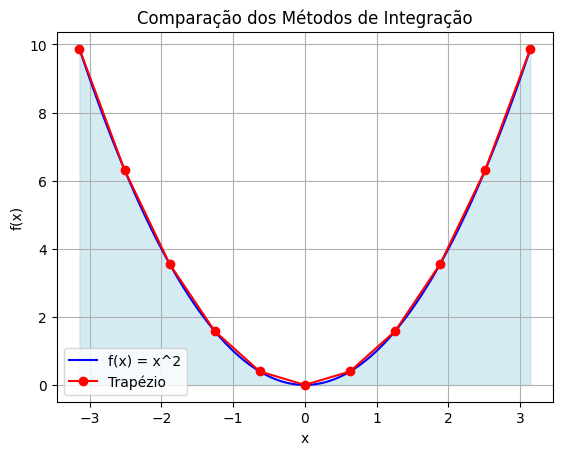

In [ ]:

#a funcao que vamos trabalhar
def f(x):
  return x**2

def trapezio_composta(a,b,n):
  #segundo a formula
  h = (b-a)/n

  integral=0*(f(a)+f(b))

  for i in range(1,n):

    xi = a+i*h
    integral+=f(xi)

    return h*integral

a=-np.pi
b=np.pi
n=int(input())
n+1
integral_simpsons = simpson_integrate(a,b,f,n)
integral_trapezio = trapezio_composta(a,b,n)

#integral pelo metodo de simpson
print(integral_simpsons)
print(f"valor de erro", abs(1/3-integral_simpsons))

#integral pelo metodo do trapezio
print(trapezio_composta)
print(f"valor de erro", {abs(1/3)-integral_trapezio})

# Imprimindo os resultados e erros
print(f"Integral pelo método de Simpson: {integral_simpsons}")
print(f"Erro (Simpson): {abs(1/3 - integral_simpsons)}")

print(f"Integral pelo método do Trapézio: {integral_trapezio}")
print(f"Erro (Trapézio): {abs(1/3 - integral_trapezio)}")

# Plotando a função e os pontos
x_vals = np.linspace(a, b, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = x^2', color='blue')
plt.fill_between(x_vals, y_vals, color='lightblue', alpha=0.5)

# Pontos de integração usados
x_trap = np.linspace(a, b, n+1)
y_trap = f(x_trap)

# Desenhar os trapézios
plt.plot(x_trap, y_trap, 'o-', label='Trapézio', color='red')

# Título e legendas
plt.title('Comparação dos Métodos de Integração')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Mostrar o gráfico
plt.grid(True)
plt.show()




seria interessante usar como modelo


# questao 4

funcoes de bessel



In [ ]:
import numpy as np

def regra_trapezio(funcao, a, b, n):
    """Calcula a integral definida de funcao no intervalo [a, b] usando a regra do trapézio.

    Args:
        funcao: A função a ser integrada.
        a: O limite inferior da integral.
        b: O limite superior da integral.
        n: O número de subintervalos.

    Returns:
        A estimativa da integral.
    """
    h = (b - a) / n  # Largura de cada subintervalo
    integral = 0.5 * (funcao(a) + funcao(b))  # Adiciona as áreas das extremidades

    # Calcula a soma das alturas
    for i in range(1, n):
        integral += funcao(a + i * h)  # Avalia a função no ponto interior

    integral *= h  # Multiplica pela largura dos subintervalos
    return integral

def jn_bessel(n, x, tolerancia=1e-5):
    """Calcula a função de Bessel de primeira espécie J_n(x) usando a regra do trapézio com precisão desejada.

    Args:
        n: A ordem da função de Bessel.
        x: O argumento da função de Bessel.
        tolerancia: O erro absoluto desejado.

    Returns:
        O valor da função de Bessel J_n(x).
    """
    # Definindo a função integranda
    def integranda(t):
        return np.cos(n * t - x * np.sin(t))

    # Inicialização
    num_pontos = 1  # Começa com um subintervalo
    integral_antiga = regra_trapezio(integranda, 0, np.pi, num_pontos)  # Calcula a integral inicial

    while True:
        num_pontos *= 2  # Dobra o número de subintervalos
        integral_nova = regra_trapezio(integranda, 0, np.pi, num_pontos)  # Calcula a nova integral

        # Verifica o erro absoluto
        if abs(integral_nova - integral_antiga) < tolerancia:
            break  # Para quando a precisão desejada for atingida

        integral_antiga = integral_nova  # Atualiza a estimativa antiga

    # Normalizando pela constante 1/π
    return integral_nova / np.pi

# Exemplo de uso
n = 0  # Ordem da função de Bessel
x = 1.0  # Valor de x
resultado = jn_bessel(n, x)
print(f"J_{n}({x}) = {resultado}")


J_0(1.0) = 0.7651976865579665


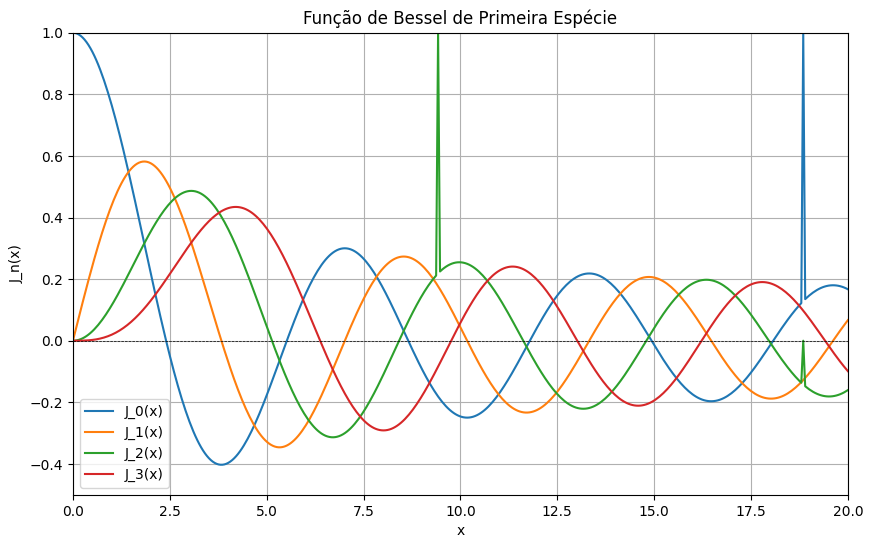

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def regra_trapezio(funcao, a, b, n):
    h = (b - a) / n
    integral = 0.5 * (funcao(a) + funcao(b))
    for i in range(1, n):
        integral += funcao(a + i * h)
    integral *= h
    return integral

def bessel(n, x, tolerancia=1e-5):
    def integranda(t):
        return np.cos(n * t - x * np.sin(t))

    num_pontos = 1
    integral_antiga = regra_trapezio(integranda, 0, np.pi, num_pontos)

    while True:
        num_pontos *= 2
        integral_nova = regra_trapezio(integranda, 0, np.pi, num_pontos)
        if abs(integral_nova - integral_antiga) < tolerancia:
            break
        integral_antiga = integral_nova

    return integral_nova / np.pi

# Definindo o intervalo para x
x_values = np.linspace(0, 20, 400)
n_values = [0, 1, 2, 3]  # Ordens da função de Bessel que queremos plotar

plt.figure(figsize=(10, 6))

# Calcula e plota J_n(x) para cada n
for n in n_values:
    jn_values = [bessel(n, x) for x in x_values]
    plt.plot(x_values, jn_values, label=f'J_{n}(x)')

# Configurações do gráfico
plt.title('Função de Bessel de Primeira Espécie')
plt.xlabel('x')
plt.ylabel('J_n(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Linha horizontal em y=0
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Linha vertical em x=0
plt.grid()
plt.legend()
plt.xlim(0, 20)
plt.ylim(-0.5, 1)
plt.show()


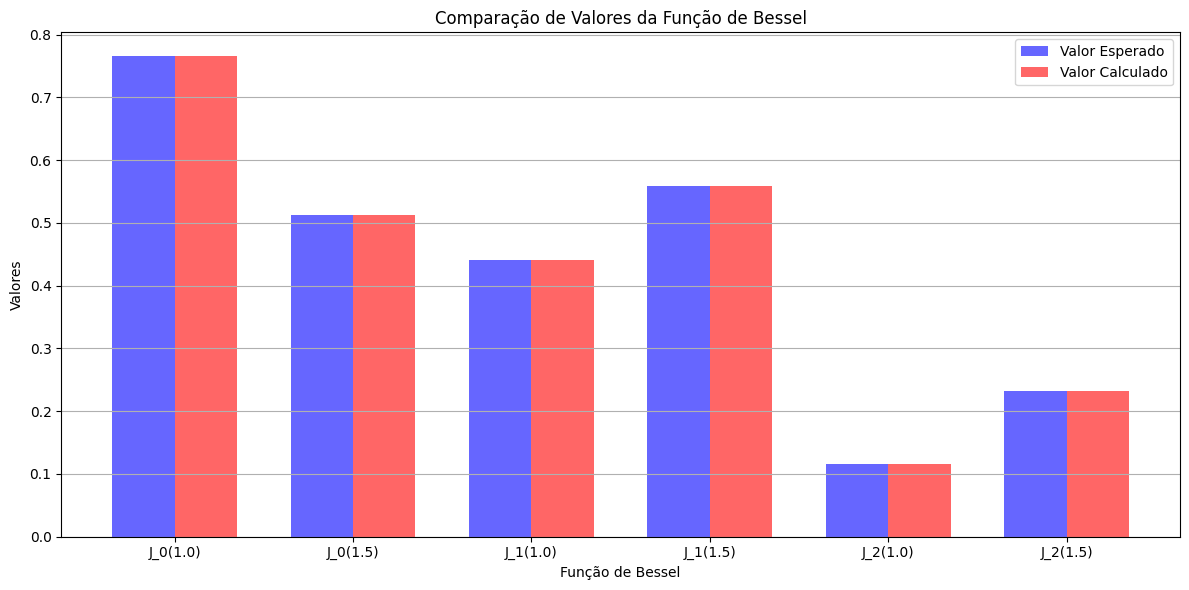

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lista de valores a serem testados com seus respectivos valores esperados
testes = [
    (0, 1.0, 0.7651976866),  # J_0(1)
    (0, 1.5, 0.5118276717),  # J_0(1.5)
    (1, 1.0, 0.4400505857449335),  # J_1(1)
    (1, 1.5, 0.5579365079),  # J_1(1.5)
    (2, 1.0, 0.1149034849319005),  # J_2(1)
    (2, 1.5, 0.2320876721)   # J_2(1.5)
]

# Extraindo dados para o gráfico
n_values = [f'J_{n}({x})' for n, x, _ in testes]
valores_esperados = [valor_esperado for _, _, valor_esperado in testes]
valores_calculados = [bessel(n, x) for n, x, _ in testes]

# Configurações do gráfico
bar_width = 0.35  # Largura das barras
index = np.arange(len(testes))  # Índices para as barras

plt.figure(figsize=(12, 6))

# Gráfico de barras para valores esperados
plt.bar(index, valores_esperados, bar_width, label='Valor Esperado', color='b', alpha=0.6)

# Gráfico de barras para valores calculados
plt.bar(index + bar_width, valores_calculados, bar_width, label='Valor Calculado', color='r', alpha=0.6)

# Configurações adicionais do gráfico
plt.title('Comparação de Valores da Função de Bessel')
plt.xlabel('Função de Bessel')
plt.ylabel('Valores')
plt.xticks(index + bar_width / 2, n_values)  # Configura os rótulos do eixo x
plt.legend()
plt.grid(axis='y')  # Grade horizontal
plt.tight_layout()  # Ajusta o layout para não cortar rótulos

# Exibe o gráfico
plt.show()

J_0(1) usando Simpson: 0.7651976866
J_0(1) usando Trapézio: 0.7651976866
J_0(1.5) usando Simpson: 0.5118276717
J_0(1.5) usando Trapézio: 0.5118276717
J_1(1) usando Simpson: 0.4400505857
J_1(1) usando Trapézio: 0.4400505857
J_1(1.5) usando Simpson: 0.5579365079
J_1(1.5) usando Trapézio: 0.5579365079
J_2(1) usando Simpson: 0.1149034849
J_2(1) usando Trapézio: 0.1149034849
J_2(1.5) usando Simpson: 0.2320876721
J_2(1.5) usando Trapézio: 0.2320876721
J_3(1) usando Simpson: 0.0195633540
J_3(1) usando Trapézio: 0.0195633540
J_3(1.5) usando Simpson: 0.0609639511
J_3(1.5) usando Trapézio: 0.0609639511


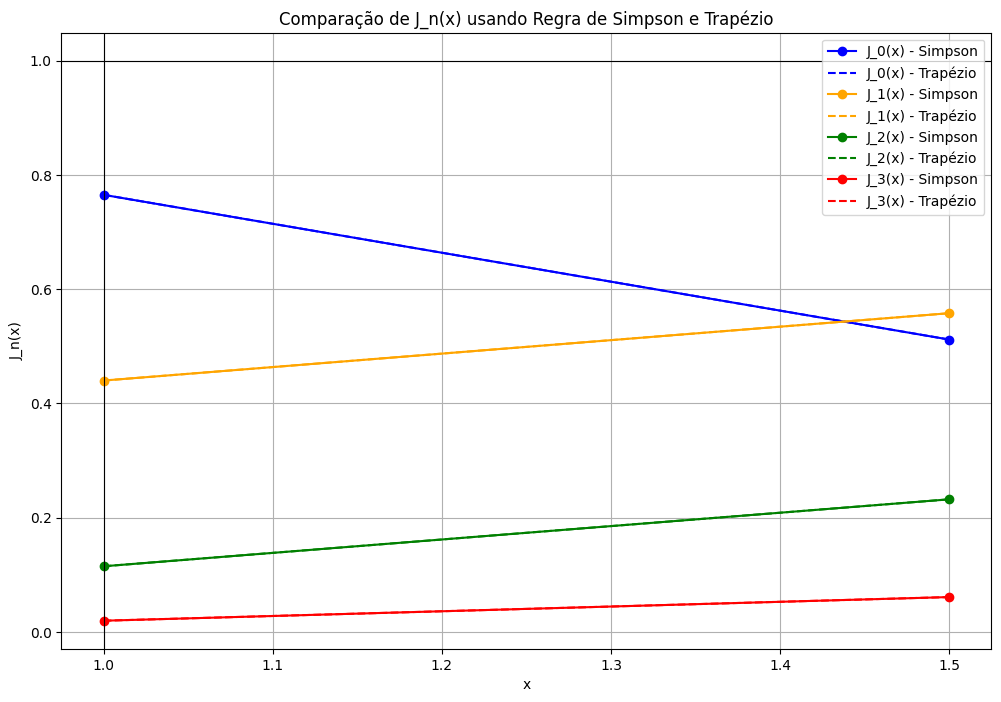

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def jn_bessel_simpson(n, x, tolerancia=1e-5):
    """Calcula a função de Bessel J_n(x) usando a regra de Simpson com tolerância especificada."""
    def integrando(t):
        return np.cos(n * t - x * np.sin(t))

    a = 0
    b = np.pi
    num_intervals = 2
    h = (b - a) / num_intervals
    integral_antiga = 0.0
    integral = integrando(a) + integrando(b)

    while True:
        integral = integrando(a) + integrando(b)
        for i in range(1, num_intervals, 2):
            integral += 4 * integrando(a + i * h)
        for i in range(2, num_intervals - 1, 2):
            integral += 2 * integrando(a + i * h)

        integral *= h / 3
        resultado = integral / np.pi

        if abs(resultado - integral_antiga) < tolerancia:
            break

        integral_antiga = resultado
        num_intervals *= 2
        h = (b - a) / num_intervals

    return resultado

def jn_bessel_trapezio(n, x, tolerancia=1e-5):
    """Calcula a função de Bessel J_n(x) usando a regra do trapézio com tolerância especificada."""
    def integrando(t):
        return np.cos(n * t - x * np.sin(t))

    a = 0
    b = np.pi
    num_intervals = 2
    h = (b - a) / num_intervals
    integral_antiga = 0.0
    integral = (integrando(a) + integrando(b)) / 2

    while True:
        integral = (integrando(a) + integrando(b)) / 2
        for i in range(1, num_intervals):
            integral += integrando(a + i * h)

        integral *= h
        resultado = integral / np.pi

        if abs(resultado - integral_antiga) < tolerancia:
            break

        integral_antiga = resultado
        num_intervals *= 2
        h = (b - a) / num_intervals

    return resultado

def comparar_integrais(n, x):
    """Compara os valores de J_n(x) calculados pela regra de Simpson e pela regra do trapézio."""
    resultado_simpson = jn_bessel_simpson(n, x)
    resultado_trapezio = jn_bessel_trapezio(n, x)
    return resultado_simpson, resultado_trapezio

# Valores para comparação
n_values = [0, 1, 2, 3]  # Ordens
x_values = [1, 1.5]      # Valores de x

# Armazenar resultados
resultados = {n: {} for n in n_values}

# Calcular os valores
for n in n_values:
    for x in x_values:
        resultados[n][x] = comparar_integrais(n, x)

# Exibir resultados
for n in n_values:
    for x in x_values:
        simpson, trapezio = resultados[n][x]
        print(f"J_{n}({x}) usando Simpson: {simpson:.10f}")
        print(f"J_{n}({x}) usando Trapézio: {trapezio:.10f}")

# Plotar os resultados
fig, ax = plt.subplots(figsize=(12, 8))

# Definindo as cores
cores = ['blue', 'orange', 'green', 'red']

for idx, n in enumerate(n_values):
    simpson_results = [resultados[n][x][0] for x in x_values]
    trapezio_results = [resultados[n][x][1] for x in x_values]

    ax.plot(x_values, simpson_results, label=f'J_{n}(x) - Simpson', color=cores[idx], marker='o')
    ax.plot(x_values, trapezio_results, label=f'J_{n}(x) - Trapézio', linestyle='--', color=cores[idx])

# Configurações do gráfico
ax.set_title('Comparação de J_n(x) usando Regra de Simpson e Trapézio')
ax.set_xlabel('x')
ax.set_ylabel('J_n(x)')
ax.grid()
ax.axhline(1, color='black', lw=0.8)  # Linha horizontal no zero
ax.axvline(1, color='black', lw=0.8)  # Linha vertical no zero
ax.legend()
plt.show()


testes de casos

In [ ]:
# Testando J_0(1)
n = 0  # Ordem da função de Bessel
x = 1.0  # Valor de x
resultado = jn_bessel(n, x)

# Valor esperado de J_0(1)
valor_esperado = 0.7651977
tolerancia = 1e-5  # Tolerância para a verificação

# Verificando se o resultado está dentro da tolerância
if abs(resultado - valor_esperado) < tolerancia:
    print(f"O teste passou: J_{n}({x}) = {resultado}, valor esperado = {valor_esperado}.")
else:
    print(f"O teste falhou: J_{n}({x}) = {resultado}, valor esperado = {valor_esperado}.")


O teste passou: J_0(1.0) = 0.7651976865579665, valor esperado = 0.7651977.
